In [196]:
import pandas as pd
import numpy as np
from pandas import Timedelta
from datetime import timedelta
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier

In [197]:
# df = pd.read_pickle("../seatunnel.pkl")
df = pd.read_pickle(r"../../models/data_train/'begin_Bloaters', 'begin_Couplers', 'begin_Object-Orientation Abusers'_3.pkl")
df = df.drop_duplicates()

In [198]:
df

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,end_time,begin_Dispensables,...,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,begin_Bloaters,begin_Couplers,begin_Object-Orientation Abusers,"['begin_Bloaters', 'begin_Couplers', 'begin_Object-Orientation Abusers']_3",scored,clusters
0,84be0f9fd057b1680d001de38802ce1c28d79f04,9a2efa51c7180b369ecfea17efaae813d9d0bfc5,1,10,4,3,3 days 01:27:48,2023-06-02T07:22:03Z,2023-06-05T08:49:51Z,500.0,...,261.0,261.0,304.0,693.0,262.0,304.0,304.0,2,0.6835,3
1,84be0f9fd057b1680d001de38802ce1c28d79f04,5e03d22d6cb5bfdaf941b7749e0a313bd6ab2f86,1,2,1,1,3 days 04:15:10,2023-06-02T05:07:40Z,2023-06-05T09:22:50Z,500.0,...,262.0,262.0,304.0,693.0,262.0,304.0,304.0,2,0.6835,3
2,84be0f9fd057b1680d001de38802ce1c28d79f04,e0d8519a9d7b6dfac29c1daf4199b6fe87781d0a,1,36,67,9,0 days 05:24:03,2023-06-02T03:16:04Z,2023-06-02T08:40:07Z,500.0,...,261.0,261.0,304.0,693.0,262.0,304.0,304.0,2,0.6835,3
3,84be0f9fd057b1680d001de38802ce1c28d79f04,d0a47b9811a30f5de6d59334bb4fcc8c74ef640b,1,21,2,3,4 days 00:22:26,2023-06-01T08:30:26Z,2023-06-05T08:52:52Z,500.0,...,261.0,261.0,304.0,693.0,262.0,304.0,304.0,2,0.6835,3
4,1b918160214a0b20ce1ae8f9e02f8e0dce243b53,988d2f0c4ef3ba8db0e701ab2105555996def4f7,8,211,212,80,12 days 00:39:27,2023-06-01T07:45:26Z,2023-06-13T08:24:53Z,499.0,...,262.0,262.0,304.0,693.0,261.0,304.0,304.0,2,0.6835,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1afed83b2c4ae750ee8159ae359924e6f8e471e4,28c87ce9911a7fc8d0fc50ff94d8351824056335,4,191,40,12,0 days 00:43:10,2019-10-30T01:18:36Z,2019-10-30T02:01:46Z,16.0,...,15.0,15.0,7.0,102.0,14.0,7.0,7.0,1,0.6835,3
1064,4bfd6cb1c97a0ffa75e0cd8a0ff8fc758de5f9d6,e03ff8b09c54470023a87f9e615cf689fc9234da,6,470,42,16,0 days 19:01:39,2019-09-19T11:01:45Z,2019-09-20T06:03:24Z,14.0,...,14.0,14.0,7.0,89.0,12.0,8.0,8.0,1,0.6835,3
1065,5fa746466941d871d4b1246b451f398416952541,4bfd6cb1c97a0ffa75e0cd8a0ff8fc758de5f9d6,2,69,49,9,0 days 00:16:22,2019-09-19T09:50:27Z,2019-09-19T10:06:49Z,14.0,...,14.0,14.0,7.0,89.0,12.0,8.0,8.0,1,0.6835,3
1066,04addef64bbd2567d47acbb7f434245fba7ac8a5,3b6a8b4058593b1ff11c44560ebcc56142cda830,1,11,1128,27,0 days 00:33:35,2019-08-13T15:14:02Z,2019-08-13T15:47:37Z,2.0,...,14.0,14.0,7.0,89.0,3.0,3.0,3.0,1,0.6835,3


In [199]:
date = pd.to_timedelta(df['total_time'])
time_hours = date.dt.total_seconds() / 3600

df['hours'] = time_hours

In [200]:
result_time  = []

for i in df['hours']:
    if i > 153.70 :
        result_time.append(0)
    elif (i>=48.54) & (i<=153.70):
        result_time.append(1)
    else:
        i <= 48.54
        result_time.append(2)
df['time_class'] = result_time

In [201]:
df.head(5)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,end_time,begin_Dispensables,...,end_Couplers,end_Object-Orientation Abusers,begin_Bloaters,begin_Couplers,begin_Object-Orientation Abusers,"['begin_Bloaters', 'begin_Couplers', 'begin_Object-Orientation Abusers']_3",scored,clusters,hours,time_class
0,84be0f9fd057b1680d001de38802ce1c28d79f04,9a2efa51c7180b369ecfea17efaae813d9d0bfc5,1,10,4,3,3 days 01:27:48,2023-06-02T07:22:03Z,2023-06-05T08:49:51Z,500.0,...,304.0,693.0,262.0,304.0,304.0,2,0.6835,3,73.463333,1
1,84be0f9fd057b1680d001de38802ce1c28d79f04,5e03d22d6cb5bfdaf941b7749e0a313bd6ab2f86,1,2,1,1,3 days 04:15:10,2023-06-02T05:07:40Z,2023-06-05T09:22:50Z,500.0,...,304.0,693.0,262.0,304.0,304.0,2,0.6835,3,76.252778,1
2,84be0f9fd057b1680d001de38802ce1c28d79f04,e0d8519a9d7b6dfac29c1daf4199b6fe87781d0a,1,36,67,9,0 days 05:24:03,2023-06-02T03:16:04Z,2023-06-02T08:40:07Z,500.0,...,304.0,693.0,262.0,304.0,304.0,2,0.6835,3,5.400833,2
3,84be0f9fd057b1680d001de38802ce1c28d79f04,d0a47b9811a30f5de6d59334bb4fcc8c74ef640b,1,21,2,3,4 days 00:22:26,2023-06-01T08:30:26Z,2023-06-05T08:52:52Z,500.0,...,304.0,693.0,262.0,304.0,304.0,2,0.6835,3,96.373889,1
4,1b918160214a0b20ce1ae8f9e02f8e0dce243b53,988d2f0c4ef3ba8db0e701ab2105555996def4f7,8,211,212,80,12 days 00:39:27,2023-06-01T07:45:26Z,2023-06-13T08:24:53Z,499.0,...,304.0,693.0,261.0,304.0,304.0,2,0.6835,3,288.657500,0


In [202]:
X = df.loc[:, ~df.columns.isin([
                                'hours', 'scored' , 'clusters' , 
                                r'[\'begin_Bloaters\', \'begin_Couplers\', \'begin_Object-Orientation Abusers\']_3' ,
                                'total_time' ,
                                'begin_sha', 'end_sha', 'begin_time' , 'begin_key', 'begin_revision', 'end_time', 'end_key', 'end_revision'
                                ])]
y = df['time_class']

In [203]:
x_drop = X.columns[-2]

In [204]:
X.drop(x_drop, axis=1)

,commits,additions,deletions,changed_files,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,begin_Bloaters,begin_Couplers,begin_Object-Orientation Abusers,time_class
0,1,10,4,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,262.0,304.0,304.0,1
1,1,2,1,1,500.0,262.0,262.0,304.0,304.0,501.0,262.0,262.0,304.0,693.0,262.0,304.0,304.0,1
2,1,36,67,9,500.0,262.0,262.0,304.0,304.0,499.0,261.0,261.0,304.0,693.0,262.0,304.0,304.0,2
3,1,21,2,3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,262.0,304.0,304.0,1
4,8,211,212,80,499.0,261.0,261.0,304.0,304.0,500.0,262.0,262.0,304.0,693.0,261.0,304.0,304.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,4,191,40,12,16.0,14.0,14.0,7.0,7.0,16.0,15.0,15.0,7.0,102.0,14.0,7.0,7.0,2
1064,6,470,42,16,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,12.0,8.0,8.0,2
1065,2,69,49,9,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,12.0,8.0,8.0,2
1066,1,11,1128,27,2.0,3.0,3.0,3.0,3.0,16.0,14.0,14.0,7.0,89.0,3.0,3.0,3.0,2


In [205]:
X_train, X_test = X[:int(0.7 * len(X))], X[int(0.7 * len(X)):]
y_train, y_test = y[:int(0.7 * len(X))], y[int(0.7 * len(X)):]

In [206]:
int(0.7 * len(X))

746

In [207]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1 , max_depth=10 , random_state=3).fit(X_train , y_train)

In [208]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , X , y , cv=5 , scoring= "accuracy")

array([1., 1., 1., 1., 1.])

In [209]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf,X,y,cv=5)
y_pred

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y , y_pred)

array([[158,   0,   0],
       [  0, 194,   0],
       [  0,   0, 714]], dtype=int64)

In [211]:
clf.predict(X)

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [212]:
clf.predict(X_train)

array([1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1,

In [213]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y,y_pred ,average='macro'))
print('recall_score = ', recall_score(y,y_pred ,average='macro'))
print('f1_score',f1_score(y,y_pred ,average='macro'))


precision =  1.0
recall_score =  1.0
f1_score 1.0


In [214]:
frame={"y":y,"y_pred": y_pred}
pd.DataFrame(frame).sum()

y         1622
y_pred    1622
dtype: int64

In [215]:
from sklearn.model_selection import GridSearchCV

parameters = {

    'learning_rate': [0.01 , 0.1 ,1.0],
    'n_estimators': [1,12,14,16],
    'subsample' : [0.7],
    'max_depth' : [1,2] ,
    'random_state':[2]

}
GradientBoosting = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoosting, parameters , cv=3 , scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [1, 2],
                         'n_estimators': [1, 12, 14, 16], 'random_state': [2],
                         'subsample': [0.7]},
             scoring='f1_macro')

In [216]:
y_pred = cross_val_predict(clf.best_estimator_,X_test,y_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,

In [217]:
y_pred_clf = clf.best_estimator_.predict(X_test)
y_pred_clf

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,

In [218]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y_test,y_pred_clf ,average='macro'))
print('recall_score = ', recall_score(y_test,y_pred_clf ,average='macro'))
print('f1_score',f1_score(y_test,y_pred_clf ,average='macro'))

precision =  1.0
recall_score =  1.0
f1_score 1.0


In [219]:
from sklearn.model_selection import GridSearchCV

parameters = {

    'learning_rate': [0.01 , 0.1 ,1],
    'n_estimators': [12,14,16],
    'subsample' : [0.7],
    'max_depth' : [2] ,
    'random_state':[2]

}
GradientBoosting = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoosting, parameters , cv=3 , scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [2],
                         'n_estimators': [12, 14, 16], 'random_state': [2],
                         'subsample': [0.7]},
             scoring='f1_macro')

In [220]:
import itertools

In [221]:
# result = itertools.combinations(X ,2)
#
# for item in result:
#     df  = pd.DataFrame(item)
#     X[list (item)]
#     parameters = {
#     'learning_rate': [0.01 , 0.1 ,1],
#     'n_estimators': [12,14,16],
#     'subsample' : [0.7],
#     'max_depth' : [2] ,
#     'random_state':[2]
#     }
#     GradientBoosting = GradientBoostingClassifier()
#     clf = GridSearchCV(GradientBoosting , parameters , cv=3 , scoring='f1_macro')
#     clf.fit(X_train[list (item)],y_train)
#     clf.predict(X_test[list (item)])
    #print('predict=',clf.predict(X_test[list (item)]))
    #print(X_test)
    #print("y_train = ",y_train)
    # print(item)
    # print("precision_score =",precision_score(clf.predict(X[list(item)]),y))
    #print("recall_score =", recall_score(clf.predict(X[list(item)]),y))
    #print("f_1=",f1_score(clf.predict(X[list(item)]),y,average='macro'))
    #print("f_1_X-test=",f1_score(clf.predict(X_test[list(item)]),y_test,average='macro'))

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ValueError: x and y must be the same size

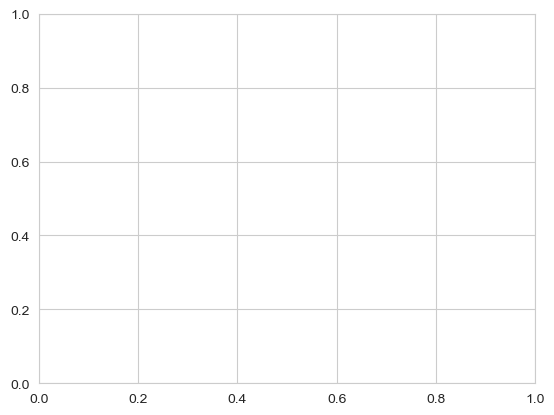

In [223]:
plt.scatter(X , y)

In [ ]:
plt.plot(X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)